In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

reviews_df = pd.read_csv('data/reviews.csv')
reviews_df

,title,developers,publishers,release_date,platforms,genres,score,reviewed_by
0,Mass Effect Legendary Edition Part 3: Mass Ef...,BioWare,Electronic Arts,2021-05-14,"Xbox One, PlayStation 4, PC","Compilation, RPG",8,Dan Stapleton
1,Call of Duty: Vanguard - Single-Player Campaign,"Treyarch, Sledgehammer Games",Activision,2021-11-05,"Xbox Series X|S, Xbox One, PlayStation 5, P...","Shooter, First-Person",7,Simon Cardy
2,Shin Megami Tensei V,Atlus,Atlus,2021-11-12,Nintendo Switch,RPG,8,Leana Hafer
3,Forza Horizon 5,Playground Games,Xbox Game Studios,2021-11-09,"PC, Xbox Series X|S, Xbox One",Racing,10,Luke Reilly
4,Riders Republic,Ubisoft Annecy,Ubisoft,2021-10-28,"Stadia, PlayStation 5, PlayStation 4, Xbox ...","Sports, Extreme Sports",8,Travis Northup
...,...,...,...,...,...,...,...,...
231,The Pathless,Giant Squid,Annapurna Interactive,2020-11-12,"PlayStation 5, iPhone, PlayStation 4, PC",Adventure,8,Jonathon Dornbush
232,iPhone 12 Pro,NaN,Apple,2020-10-23,iPhone,Hardware,8,Kevin Lee
233,Monster Truck Championship,Teyon,Nacon,2020-10-15,"PC, Xbox One, Nintendo Switch, PlayStation 4",Racing,7,Luke Reilly
234,Bugsnax,"Young Horses, Inc.","Young Horses, Inc.",2020-11-12,"PC, PlayStation 4, PlayStation 5","Adventure, RPG, Simulation, First-Person",8,Simon Cardy


In [2]:
reviews_df.isnull().sum()

title            0
developers      31
publishers       4
release_date    15
platforms        2
genres           1
score            0
reviewed_by      0
dtype: int64

In [3]:
from collections import Counter
from itertools import chain


reviews_df['genres'] = reviews_df['genres'].fillna('NaN')
value_count_genres = pd.Series(Counter(chain.from_iterable((reviews_df['genres'].str.split(',  '))))).to_frame()
value_count_genres = value_count_genres.rename(columns = {0: 'genres'})

In [4]:
value_count_genres_sorted = value_count_genres.sort_values(by = ['genres'], ascending = False)
value_count_genres_sorted

,genres
Action,78
RPG,57
Adventure,51
Shooter,23
Platformer,18
Strategy,18
Sports,13
Board,13
Racing,12
Hardware,10


In [5]:
reviews_df[reviews_df['platforms'].isnull()]

,title,developers,publishers,release_date,platforms,genres,score,reviewed_by
25,Nintendo Switch – OLED Model,NaN,NaN,2021-10-08,NaN,"Hardware, Console",8,Taylor Lyles
132,SteelSeries Arctis Prime,NaN,SteelSeries,NaN,NaN,Audio Headset / Earbuds,8,Mike Epstein


In [6]:
reviews_df.drop(labels = [25, 132], axis = 0, inplace = True)
reviews_df.isnull().sum()

title            0
developers      29
publishers       3
release_date    14
platforms        0
genres           0
score            0
reviewed_by      0
dtype: int64

In [7]:
reviews_df[reviews_df['publishers'].isnull()]

,title,developers,publishers,release_date,platforms,genres,score,reviewed_by
86,Crowfall,NaN,NaN,NaN,PC,"RPG, Persistent Online",5,Gabriel Moss
111,Atari VCS,NaN,NaN,NaN,TV game systems,Hardware,5,Seth G. Macy
182,Valheim Early Access,Iron Gate AB,NaN,NaN,PC,"Action, Adventure",9,Leana Hafer


In [8]:
reviews_df.at[86, 'developers'] = 'ArtCraft'
reviews_df.at[86, 'publishers'] = 'ArtCraft'
reviews_df.at[182, 'publishers'] = 'Coffee Stain Studios'
reviews_df.isnull().sum()

title            0
developers      28
publishers       1
release_date    14
platforms        0
genres           0
score            0
reviewed_by      0
dtype: int64

In [9]:
reviews_df[reviews_df['developers'].isnull()]

,title,developers,publishers,release_date,platforms,genres,score,reviewed_by
5,Galaxy Trucker Board Game,NaN,Czech Games Edition,2021-11-03,Tabletop,"Simulation, Party, Board",7,Matt Thrower
12,Furnace Board Game,NaN,Arcane Wonders,2021-09-15,Tabletop,Simulation,7,Matt Thrower
18,Dune: Imperium,NaN,Dire Wolf Digital,2021-05-18,Tabletop,"Strategy, Deckbuilder",9,Matt Thrower
32,World of Warcraft: Wrath of the Lich King - A ...,NaN,Z-Man Games,2021-10-04,Tabletop,"RPG, Board",9,Matthew Adler
35,Catan 3D,NaN,Asmodee Group,2021-08-27,Tabletop,"Strategy, Board",6,Wesley LeBlanc
40,"Warhammer 40,000: Fireteam",NaN,Games Workshop,2021-09-11,Tabletop,"RPG, Board",7,Matt Thrower
45,Ticket to Ride: Europe 15th Anniversary Edition,NaN,Days of Wonder,NaN,Tabletop,"Simulation, Board",9,Chris Reed
62,Brew Board Game,NaN,Pandasaurus,2021-06-16,Tabletop,"Simulation, Board",6,Matt Thrower
77,Descent: Legends of the Dark,NaN,Fantasy Flight Games,2021-08-05,Tabletop,"RPG, Board",7,Matt Thrower
83,Unmatched: Cobble & Fog,NaN,Restoration Games,2020-01-01,Tabletop,"Fighting, Board",8,Matt Thrower


In [10]:
import datetime

reviews_df.at[5, 'developers'] = 'Vlaada Chvatil'
reviews_df.at[12, 'developers'] = 'Ivan Lashin'
reviews_df.at[18, 'developers'] = 'Dire Wolf Digital'
reviews_df.at[32, 'developers'] = 'Alexandar Ortloff, Justin Kemppainen, Michael Sanfilippo'
reviews_df.at[35, 'developers'] = 'CATAN Studio'
reviews_df.at[40, 'developers'] = 'Kuju Entertainment'
reviews_df.at[45, 'developers'] = 'Alan R. Moon'
reviews_df.at[45, 'release_date'] = datetime.datetime(2021, 6, 25)
reviews_df.at[62, 'developers'] = 'Stevo Torres'
reviews_df.at[77, 'developers'] = 'Fantasy Flight Games'
reviews_df.at[83, 'developers'] = 'Restoration Games'
reviews_df.at[87, 'developers'] = 'Prospero Hall, Peter Lee'
reviews_df.at[95, 'developers'] = 'Square Enix, h.a.n.d., Jupiter Corporation'
reviews_df.at[97, 'developers'] = 'Isaac Childres'
reviews_df.at[103, 'developers'] = 'Games Workshop'
reviews_df.at[113, 'developers'] = 'TOYBOX Inc.'
reviews_df.at[121, 'developers'] = 'Greg Lobanov'
reviews_df.drop(labels = [111, 131, 165, 168, 187, 196, 230, 232, 200, 219, 220], axis = 0, inplace = True)
reviews_df.at[121, 'developers'] = 'Noodlecake Studios'
reviews_df.at[221, 'developers'] = 'indieszero, Square Enix, Square Enix First Development Division'

In [11]:
reviews_df.isnull().sum()

title           0
developers      0
publishers      0
release_date    9
platforms       0
genres          0
score           0
reviewed_by     0
dtype: int64

In [12]:
reviews_df[reviews_df['release_date'].isnull()]

,title,developers,publishers,release_date,platforms,genres,score,reviewed_by
7,Unpacking,Witch Beam,Witch Beam,NaN,PC,Puzzle,8,Sarah LeBoeuf
15,Lone Echo 2,Ready At Dawn Studios,Oculus VR,NaN,PC,"Action, VR",6,Jordan Oloman
39,World War Z: Aftermath,Saber Interactive,Saber Interactive,NaN,"Stadia, Xbox Series X|S, Xbox One, PlayStat...",Action,8,Travis Northup
42,Sable,Shedworks,Raw Fury Games,NaN,"Xbox One, PC, Xbox Series X|S","Action, Adventure",7,Travis Northup
52,TOEM,Something We Made,Something We Made,NaN,"PC, Nintendo Switch",NaN,8,Rebekah Valentine
69,I Expect You To Die 2,Schell Games,Schell Games,NaN,"PC, Oculus Quest, PlayStation 4","Puzzle, VR",8,Gabriel Moss
86,Crowfall,ArtCraft,ArtCraft,NaN,PC,"RPG, Persistent Online",5,Gabriel Moss
182,Valheim Early Access,Iron Gate AB,Coffee Stain Studios,NaN,PC,"Action, Adventure",9,Leana Hafer
197,Everspace 2 Early Access,RockFish Games,RockFish Games,NaN,"PlayStation 4, PC, Xbox One","Action, Shooter, Flight",7,Dan Stapleton


In [13]:
reviews_df.at[7, 'release_date'] = datetime.datetime(2021, 11, 2)
reviews_df.at[15, 'release_date'] = datetime.datetime(2021, 10, 12)
reviews_df.at[39, 'release_date'] = datetime.datetime(2021, 9, 21)
reviews_df.at[42, 'release_date'] = datetime.datetime(2021, 9, 23)
reviews_df.at[52, 'release_date'] = datetime.datetime(2021, 9, 17)
reviews_df.at[69, 'release_date'] = datetime.datetime(2021, 8, 24)
reviews_df.at[86, 'release_date'] = datetime.datetime(2021, 7, 6)
reviews_df.at[182, 'release_date'] = datetime.datetime(2021, 2, 2)
reviews_df.at[197, 'release_date'] = datetime.datetime(2021, 1, 18)
reviews_df.isnull().sum()

title           0
developers      0
publishers      0
release_date    0
platforms       0
genres          0
score           0
reviewed_by     0
dtype: int64

In [14]:
reviews_df['release_date'] = pd.to_datetime(reviews_df['release_date'])

In [15]:
holidays_df = pd.read_csv('data/US Holiday Dates (2004-2021).csv')
holidays_df

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008
...,...,...,...,...,...,...
337,2006-04-16,Western Easter,Sunday,4,16,2006
338,2017-04-16,Western Easter,Sunday,4,16,2017
339,2014-04-20,Western Easter,Sunday,4,20,2014
340,2019-04-21,Western Easter,Sunday,4,21,2019


In [16]:
holidays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     342 non-null    object
 1   Holiday  342 non-null    object
 2   WeekDay  342 non-null    object
 3   Month    342 non-null    int64 
 4   Day      342 non-null    int64 
 5   Year     342 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.2+ KB


In [17]:
holidays_df['Date'] = pd.to_datetime(holidays_df['Date'])
holidays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     342 non-null    datetime64[ns]
 1   Holiday  342 non-null    object        
 2   WeekDay  342 non-null    object        
 3   Month    342 non-null    int64         
 4   Day      342 non-null    int64         
 5   Year     342 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 16.2+ KB


In [18]:
reviews_df = reviews_df.merge(holidays_df, how = 'left', left_on = 'release_date', right_on = 'Date')
isHoliday_df = reviews_df['Date'].value_counts().to_frame()
isHoliday_lst = isHoliday_df.index.to_list()
isHoliday_lst

[Timestamp('2020-01-01 00:00:00'), Timestamp('2021-01-18 00:00:00')]

In [19]:
reviews_df['Date'].fillna(False, inplace = True)
reviews_df['Date'].replace(isHoliday_lst, True, inplace = True)
reviews_df['isHoliday']  = reviews_df['Date']
reviews_df.drop(['Date', 'Holiday', 'WeekDay', 'Month', 'Day', 'Year'], axis = 1, inplace = True)

In [20]:
reviews_df['isHoliday'].value_counts()

False    221
True       2
Name: isHoliday, dtype: int64

In [21]:
score_freq_dict = (reviews_df.groupby('score')['score'].count()/reviews_df.shape[0]).to_dict()
score_freq_df = pd.DataFrame(score_freq_dict.items(), columns = ['score', 'score_freq'])
reviews_df = reviews_df.merge(score_freq_df, how = 'left', on = 'score')
reviews_df

,title,developers,publishers,release_date,platforms,genres,score,reviewed_by,isHoliday,score_freq
0,Mass Effect Legendary Edition Part 3: Mass Ef...,BioWare,Electronic Arts,2021-05-14,"Xbox One, PlayStation 4, PC","Compilation, RPG",8,Dan Stapleton,False,0.304933
1,Call of Duty: Vanguard - Single-Player Campaign,"Treyarch, Sledgehammer Games",Activision,2021-11-05,"Xbox Series X|S, Xbox One, PlayStation 5, P...","Shooter, First-Person",7,Simon Cardy,False,0.269058
2,Shin Megami Tensei V,Atlus,Atlus,2021-11-12,Nintendo Switch,RPG,8,Leana Hafer,False,0.304933
3,Forza Horizon 5,Playground Games,Xbox Game Studios,2021-11-09,"PC, Xbox Series X|S, Xbox One",Racing,10,Luke Reilly,False,0.013453
4,Riders Republic,Ubisoft Annecy,Ubisoft,2021-10-28,"Stadia, PlayStation 5, PlayStation 4, Xbox ...","Sports, Extreme Sports",8,Travis Northup,False,0.304933
...,...,...,...,...,...,...,...,...,...,...
218,Call of Duty: Black Ops Cold War – Campaign,"Raven Software, Treyarch",Activision,2020-11-13,"Xbox Series X|S, Xbox One, PlayStation 5, P...",Shooter,7,Ryan McCaffrey,False,0.269058
219,The Pathless,Giant Squid,Annapurna Interactive,2020-11-12,"PlayStation 5, iPhone, PlayStation 4, PC",Adventure,8,Jonathon Dornbush,False,0.304933
220,Monster Truck Championship,Teyon,Nacon,2020-10-15,"PC, Xbox One, Nintendo Switch, PlayStation 4",Racing,7,Luke Reilly,False,0.269058
221,Bugsnax,"Young Horses, Inc.","Young Horses, Inc.",2020-11-12,"PC, PlayStation 4, PlayStation 5","Adventure, RPG, Simulation, First-Person",8,Simon Cardy,False,0.304933


In [22]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 0 to 222
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         223 non-null    object        
 1   developers    223 non-null    object        
 2   publishers    223 non-null    object        
 3   release_date  223 non-null    datetime64[ns]
 4   platforms     223 non-null    object        
 5   genres        223 non-null    object        
 6   score         223 non-null    int64         
 7   reviewed_by   223 non-null    object        
 8   isHoliday     223 non-null    bool          
 9   score_freq    223 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 17.6+ KB


C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='score'>

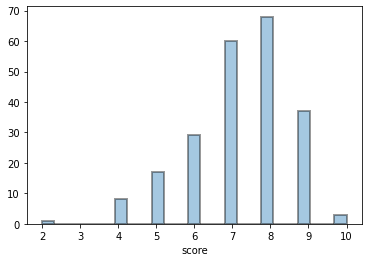

In [23]:
sns.distplot(reviews_df['score'], kde = False, hist_kws = dict(edgecolor = "k", linewidth = 2))